In [3]:
import numpy as np
import pandas as pd
from dowhy import CausalModel
import graphviz
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
# EconML imports
from econml.dml import LinearDML, CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter
import seaborn as sns
import dowhy.plotter
%matplotlib inline
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')



# The Direct Acyclic Graph

G=graphviz.Digraph()
G.edge("HDD18_bins" , "city_code")
G.edge("HDD18_bins" , "housing_direction")
G.edge("HDD18_bins" , "N_of_heating_room_winter")
G.edge("HDD18_bins" , "N_of_heating_liv_room_winter")
G.edge("HDD18_bins" , "N_of_heating_bathroom_winter")
G.edge("HDD18_bins" , "N_of_ext_wall_win_group")
G.edge("HDD18_bins" , "ratio_double_glazed_group")
G.edge("HDD18_bins" , "N_double_glazed_win_group")
G.edge("HDD18_bins" , "main_heat_facility")
G.edge("HDD18_bins" , "main_heat_fuel")
G.edge("HDD18_bins" , "keros_boil_heat_output")
G.edge("HDD18_bins" , "keros_boil_heat_efficiency")
G.edge("HDD18_bins" , "gas_boil_heat_output")
G.edge("HDD18_bins" , "gas boil_power consumption")
G.edge("HDD18_bins" , "gas boiler_eff_rating")
G.edge("HDD18_bins" , "gas boil_heat efficiency")
G.edge("HDD18_bins" , "elec_rate_check")
G.edge("HDD18_bins" , "city_g_rate_check")
G.edge("HDD18_bins" , "gas_avg_monthly_heat_cost_group")
G.edge("HDD18_bins" , "gas_last_winter_heat_statisfaction")
G.edge("HDD18_bins" , "insul_added_material")
G.edge("HDD18_bins" , "improve_energy_method")
G.edge("HDD18_bins" , "energy_savinng_prog")
G.edge("HDD18_bins" , "total_kWh")

#########################
G.edge("city_code" , "housing_direction")
G.edge("city_code" , "N_of_heating_room_winter")
G.edge("city_code" , "N_of_heating_liv_room_winter")
G.edge("city_code" , "N_of_heating_bathroom_winter")
G.edge("city_code" , "N_of_ext_wall_win_group")
G.edge("city_code" , "ratio_double_glazed_group")
G.edge("city_code" , "N_double_glazed_win_group")
G.edge("city_code" , "main_heat_facility")
G.edge("city_code" , "main_heat_fuel")
G.edge("city_code" , "aux_heat_used")
G.edge("city_code" , "keros_boil_heat_output")
G.edge("city_code" , "keros_boil_heat_efficiency")
G.edge("city_code" , "gas_boil_heat_output")
G.edge("city_code" , "gas boil_power consumption")
G.edge("city_code" , "gas boiler_eff_rating")
G.edge("city_code" , "gas boil_heat efficiency")
G.edge("city_code" , "elec_boil_power_eff_rating")
G.edge("city_code" , "elec_rate_check")
G.edge("city_code" , "city_g_rate_check")
G.edge("city_code" , "why_not_check_city_el_rate")
G.edge("city_code" , "gas_avg_monthly_heat_cost_group")
G.edge("city_code" , "gas_last_winter_heat_statisfaction")
G.edge("city_code" , "insuf_heat_due_to_cost")
G.edge("city_code" , "insul_added_material")
G.edge("city_code" , "improve_energy_method")
G.edge("city_code" , "energy_savinng_prog")
G.edge("city_code" , "total_kWh")

############################################
G.edge("housing_type" , "res_floor_group")
G.edge("housing_type" , "N_of_outer_walls")
G.edge("housing_type" , "housing_direction")
G.edge("housing_type" , "completion_year_group")
G.edge("housing_type" , "res_area")
G.edge("housing_type" , "N_of_heating_room_winter")
G.edge("housing_type" , "N_of_heating_liv_room_winter")
G.edge("housing_type" , "N_of_heating_bathroom_winter")
G.edge("housing_type" , "N_of_ext_wall_win_group")
G.edge("housing_type" , "ratio_double_glazed_group")
G.edge("housing_type" , "N_double_glazed_win_group")
G.edge("housing_type" , "h_occupancy_type")
G.edge("housing_type" , "main_heat_facility")
G.edge("housing_type" , "main_heat_fuel")
G.edge("housing_type" , "aux_heat_used")
G.edge("housing_type" , "gas boil_heat efficiency")
G.edge("housing_type" , "cook_equip_used")
G.edge("housing_type" , "renewable_installed")
G.edge("housing_type" , "why_not_check_city_el_rate")
G.edge("housing_type" , "gas_avg_monthly_heat_cost_group")
G.edge("housing_type" , "gas_last_winter_heat_statisfaction")
G.edge("housing_type" , "insul_added_material")
G.edge("housing_type" , "improve_energy_method")
G.edge("housing_type" , "energy_savinng_prog")
G.edge("N_of_house_members_category" , "housing_type")
G.edge("gender" , "housing_type")
G.edge("head_house_age_group" , "housing_type")
G.edge("head_house_edu_group" , "housing_type")
G.edge("head_house_occ_group" , "housing_type")
G.edge("head_house_income_source_group" , "housing_type")
G.edge("av_monthly_income_group" , "housing_type")
G.edge("housing_type" , "total_kWh")

############################################
G.edge("res_floor_group" , "res_area")
G.edge("res_floor_group" , "N_of_heating_room_winter")
G.edge("res_floor_group" , "N_of_heating_liv_room_winter")
G.edge("res_floor_group" , "N_of_heating_bathroom_winter")
G.edge("res_floor_group" , "N_of_ext_wall_win_group")
G.edge("res_floor_group" , "h_occupancy_type")
G.edge("res_floor_group" , "main_heat_facility")
G.edge("res_floor_group" , "main_heat_fuel")
G.edge("res_floor_group" , "aux_heat_used")
G.edge("res_floor_group" , "renewable_installed")
G.edge("res_floor_group" , "gas_avg_monthly_heat_cost_group")
G.edge("res_floor_group" , "gas_last_winter_heat_statisfaction")
G.edge("res_floor_group" , "insul_added_material")
G.edge("res_floor_group" , "energy_savinng_prog")
G.edge("head_house_edu_group" , "res_floor_group")
G.edge("head_house_occ_group" , "res_floor_group")
G.edge("head_house_income_source_group" , "res_floor_group")
G.edge("annual_income_category" , "res_floor_group")
G.edge("av_monthly_income_group" , "res_floor_group")
G.edge("res_floor_group" , "total_kWh")

############################################
G.edge("housing_direction" , "N_of_outer_walls")
G.edge("completion_year_group" , "N_of_outer_walls")
G.edge("N_of_outer_walls" , "N_of_ext_wall_win_group")
G.edge("N_of_outer_walls" , "ratio_double_glazed_group")
G.edge("N_of_outer_walls" , "N_double_glazed_win_group")
G.edge("N_of_outer_walls" , "main_heat_facility")
G.edge("N_of_outer_walls" , "main_heat_fuel")
G.edge("N_of_outer_walls" , "aux_heat_used")
G.edge("N_of_outer_walls" , "gas_avg_monthly_heat_cost_group")
G.edge("N_of_outer_walls" , "gas_last_winter_heat_statisfaction")
G.edge("N_of_outer_walls" , "insul_added_material")
G.edge("N_of_outer_walls" , "improve_energy_method")
G.edge("N_of_outer_walls" , "total_kWh")

############################################
G.edge("housing_direction" , "N_of_ext_wall_win_group")
G.edge("housing_direction" , "N_double_glazed_win_group")
G.edge("housing_direction" , "renewable_installed")
G.edge("housing_direction" , "energy_savinng_prog")
G.edge("housing_direction" , "total_kWh")

############################################
G.edge("res_area" , "completion_year_group")
G.edge("completion_year_group" , "N_of_heating_room_winter")
G.edge("completion_year_group" , "N_of_heating_liv_room_winter")
G.edge("completion_year_group" , "N_of_heating_bathroom_winter")
G.edge("completion_year_group" , "N_of_ext_wall_win_group")
G.edge("completion_year_group" , "ratio_double_glazed_group")
G.edge("completion_year_group" , "N_double_glazed_win_group")
G.edge("completion_year_group" , "h_occupancy_type")
G.edge("completion_year_group" , "main_heat_facility")
G.edge("completion_year_group" , "main_heat_fuel")
G.edge("completion_year_group" , "aux_heat_used")
G.edge("completion_year_group" , "keros_boil_heat_efficiency")
G.edge("completion_year_group" , "gas_boil_heat_output")
G.edge("completion_year_group" , "gas boiler_eff_rating")
G.edge("completion_year_group" , "gas boil_heat efficiency")
G.edge("completion_year_group" , "elec_boil_heat_output_lcal_h")
G.edge("completion_year_group" , "elec_boil_power_eff_rating")
G.edge("completion_year_group" , "cook_equip_used")
G.edge("completion_year_group" , "elec_rate_check")
G.edge("completion_year_group" , "city_g_rate_check")
G.edge("completion_year_group" , "why_not_check_city_el_rate")
G.edge("completion_year_group" , "gas_last_winter_heat_statisfaction")
G.edge("head_house_age_group" , "completion_year_group")
G.edge("head_house_edu_group" , "completion_year_group")
G.edge("head_house_occ_group" , "completion_year_group")
G.edge("head_house_income_source_group" , "completion_year_group")
G.edge("annual_income_category" , "completion_year_group")
G.edge("av_monthly_income_group" , "completion_year_group")
G.edge("completion_year_group" , "total_kWh")

############################################
G.edge("res_area" , "N_of_heating_room_winter")
G.edge("res_area" , "N_of_heating_liv_room_winter")
G.edge("res_area" , "N_of_heating_bathroom_winter")
G.edge("res_area" , "N_of_ext_wall_win_group")
G.edge("res_area" , "ratio_double_glazed_group")
G.edge("res_area" , "N_double_glazed_win_group")
G.edge("res_area" , "h_occupancy_type")
G.edge("res_area" , "main_heat_facility")
G.edge("res_area" , "main_heat_fuel")
G.edge("res_area" , "keros_boil_heat_efficiency")
G.edge("res_area" , "gas_boil_heat_output")
G.edge("res_area" , "gas boil_power consumption")
G.edge("res_area" , "gas boiler_eff_rating")
G.edge("res_area" , "gas boil_heat efficiency")
G.edge("res_area" , "cook_equip_used")
G.edge("res_area" , "gas_avg_monthly_heat_cost_group")
G.edge("res_area" , "gas_last_winter_heat_statisfaction")
G.edge("res_area" , "energy_savinng_prog")
G.edge("N_of_house_members_category" , "res_area")
G.edge("gender" , "res_area")
G.edge("head_house_age_group" , "res_area")
G.edge("head_house_edu_group" , "res_area")
G.edge("head_house_occ_group" , "res_area")
G.edge("head_house_income_source_group" , "res_area")
G.edge("annual_income_category" , "res_area")
G.edge("av_monthly_income_group" , "res_area")
G.edge("res_area" , "total_kWh")

############################################
G.edge("N_of_heating_room_winter" , "N_of_heating_liv_room_winter")
G.edge("N_of_heating_room_winter" , "N_of_heating_bathroom_winter")
G.edge("h_occupancy_type" , "N_of_heating_room_winter")
G.edge("N_of_heating_room_winter" , "main_heat_facility")
G.edge("N_of_heating_room_winter" , "main_heat_fuel")
G.edge("N_of_heating_room_winter" , "aux_heat_used")
G.edge("N_of_heating_room_winter" , "gas_boil_heat_output")
G.edge("N_of_heating_room_winter" , "gas boiler_eff_rating")
G.edge("N_of_heating_room_winter" , "gas boil_heat efficiency")
G.edge("N_of_heating_room_winter" , "elec_rate_check")
G.edge("N_of_heating_room_winter" , "why_not_check_city_el_rate")
G.edge("N_of_heating_room_winter" , "gas_last_winter_heat_statisfaction")
G.edge("N_of_house_members_category" , "N_of_heating_room_winter")
G.edge("gender" , "N_of_heating_room_winter")
G.edge("head_house_age_group" , "N_of_heating_room_winter")
G.edge("head_house_edu_group" , "N_of_heating_room_winter")
G.edge("head_house_occ_group" , "N_of_heating_room_winter")
G.edge("head_house_income_source_group" , "N_of_heating_room_winter")
G.edge("annual_income_category" , "N_of_heating_room_winter")
G.edge("av_monthly_income_group" , "N_of_heating_room_winter")
G.edge("N_of_heating_room_winter" , "total_kWh")

############################################
G.edge("N_of_ext_wall_win_group" , "N_of_heating_liv_room_winter")
G.edge("ratio_double_glazed_group" , "N_of_heating_liv_room_winter")
G.edge("N_double_glazed_win_group" , "N_of_heating_liv_room_winter")
G.edge("h_occupancy_type" , "N_of_heating_liv_room_winter")
G.edge("N_of_heating_liv_room_winter" , "main_heat_facility")
G.edge("N_of_heating_liv_room_winter" , "main_heat_fuel")
G.edge("N_of_heating_liv_room_winter" , "aux_heat_used")
G.edge("N_of_heating_liv_room_winter" , "elec_rate_check")
G.edge("N_of_heating_liv_room_winter" , "why_not_check_city_el_rate")
G.edge("N_of_heating_liv_room_winter" , "gas_last_winter_heat_statisfaction")
G.edge("N_of_heating_liv_room_winter" , "insul_added_material")
G.edge("N_of_house_members_category" , "N_of_heating_liv_room_winter")
G.edge("gender" , "N_of_heating_liv_room_winter")
G.edge("head_house_age_group" , "N_of_heating_liv_room_winter")
G.edge("head_house_edu_group" , "N_of_heating_liv_room_winter")
G.edge("head_house_occ_group" , "N_of_heating_liv_room_winter")
G.edge("head_house_income_source_group" , "N_of_heating_liv_room_winter")
G.edge("av_monthly_income_group" , "N_of_heating_liv_room_winter")
G.edge("N_of_heating_liv_room_winter" , "total_kWh")

############################################
G.edge("N_of_ext_wall_win_group" , "N_of_heating_bathroom_winter")
G.edge("ratio_double_glazed_group" , "N_of_heating_bathroom_winter")
G.edge("N_double_glazed_win_group" , "N_of_heating_bathroom_winter")
G.edge("N_of_heating_bathroom_winter" , "main_heat_facility")
G.edge("N_of_heating_bathroom_winter" , "main_heat_fuel")
G.edge("N_of_heating_bathroom_winter" , "gas_boil_heat_output")
G.edge("N_of_heating_bathroom_winter" , "gas boiler_eff_rating")
G.edge("N_of_heating_bathroom_winter" , "gas boil_heat efficiency")
G.edge("N_of_heating_bathroom_winter" , "elec_boil_power_eff_rating")
G.edge("N_of_heating_bathroom_winter" , "why_not_check_city_el_rate")
G.edge("N_of_heating_bathroom_winter" , "why_not_check_city_g_rate")
G.edge("N_of_heating_bathroom_winter" , "insul_added_material")
G.edge("N_of_heating_bathroom_winter" , "improve_energy_method")
G.edge("N_of_house_members_category" , "N_of_heating_bathroom_winter")
G.edge("gender" , "N_of_heating_bathroom_winter")
G.edge("head_house_age_group" , "N_of_heating_bathroom_winter")
G.edge("head_house_edu_group" , "N_of_heating_bathroom_winter")
G.edge("head_house_occ_group" , "N_of_heating_bathroom_winter")
G.edge("head_house_income_source_group" , "N_of_heating_bathroom_winter")
G.edge("annual_income_category" , "N_of_heating_bathroom_winter")
G.edge("av_monthly_income_group" , "N_of_heating_bathroom_winter")
G.edge("N_of_heating_bathroom_winter" , "total_kWh")


############################################
G.edge("N_of_ext_wall_win_group" , "ratio_double_glazed_group")
G.edge("N_of_ext_wall_win_group" , "N_double_glazed_win_group")
# G.edge("h_occupancy_type" , "N_of_ext_wall_win_group")
G.edge("N_of_ext_wall_win_group" , "main_heat_facility")
G.edge("N_of_ext_wall_win_group" , "main_heat_fuel")
G.edge("N_of_ext_wall_win_group" , "keros_boil_heat_output")
G.edge("N_of_ext_wall_win_group" , "gas_boil_heat_output")
G.edge("N_of_ext_wall_win_group" , "gas_last_winter_heat_statisfaction")
G.edge("N_of_ext_wall_win_group" , "insul_added_material")
G.edge("N_of_house_members_category" , "N_of_ext_wall_win_group")
G.edge("gender" , "N_of_ext_wall_win_group")
G.edge("head_house_age_group" , "N_of_ext_wall_win_group")
G.edge("head_house_edu_group" , "N_of_ext_wall_win_group")
G.edge("head_house_occ_group" , "N_of_ext_wall_win_group")
G.edge("head_house_income_source_group" , "N_of_ext_wall_win_group")
G.edge("av_monthly_income_group" , "N_of_ext_wall_win_group")
G.edge("N_of_ext_wall_win_group" , "total_kWh")

############################################
G.edge("N_double_glazed_win_group" , "ratio_double_glazed_group")
G.edge("h_occupancy_type" , "ratio_double_glazed_group")
G.edge("ratio_double_glazed_group" , "main_heat_facility")
G.edge("ratio_double_glazed_group" , "main_heat_fuel")
G.edge("ratio_double_glazed_group" , "aux_heat_used")
G.edge("ratio_double_glazed_group" , "elec_rate_check")
G.edge("ratio_double_glazed_group" , "city_g_rate_check")
G.edge("ratio_double_glazed_group" , "why_not_check_city_el_rate")
G.edge("ratio_double_glazed_group" , "why_not_check_city_g_rate")
G.edge("ratio_double_glazed_group" , "gas_avg_monthly_heat_cost_group")
G.edge("ratio_double_glazed_group" , "gas_last_winter_heat_statisfaction")
G.edge("ratio_double_glazed_group" , "insuf_heat_due_to_cost")
G.edge("ratio_double_glazed_group" , "insul_added_material")
G.edge("ratio_double_glazed_group" , "improve_energy_method")
G.edge("head_house_edu_group" , "ratio_double_glazed_group")
G.edge("head_house_occ_group" , "ratio_double_glazed_group")
G.edge("head_house_income_source_group" , "ratio_double_glazed_group")
G.edge("av_monthly_income_group" , "ratio_double_glazed_group")
G.edge("ratio_double_glazed_group" , "total_kWh")


############################################
G.edge("h_occupancy_type" , "N_double_glazed_win_group")
G.edge("N_double_glazed_win_group" , "main_heat_facility")
G.edge("N_double_glazed_win_group" , "main_heat_fuel")
G.edge("N_double_glazed_win_group" , "aux_heat_used")
G.edge("N_double_glazed_win_group" , "gas_avg_monthly_heat_cost_group")
G.edge("N_double_glazed_win_group" , "gas_last_winter_heat_statisfaction")
G.edge("head_house_edu_group" , "N_double_glazed_win_group")
G.edge("head_house_occ_group" , "N_double_glazed_win_group")
G.edge("av_monthly_income_group" , "N_double_glazed_win_group")
G.edge("N_double_glazed_win_group" , "total_kWh")

############################################
G.edge("h_occupancy_type" , "main_heat_facility")
G.edge("h_occupancy_type" , "main_heat_fuel")
G.edge("h_occupancy_type" , "aux_heat_used")
G.edge("h_occupancy_type" , "gas_boil_heat_output")
G.edge("h_occupancy_type" , "gas boiler_eff_rating")
G.edge("h_occupancy_type" , "cook_equip_used")
G.edge("h_occupancy_type" , "elec_rate_check")
G.edge("h_occupancy_type" , "city_g_rate_check")
G.edge("h_occupancy_type" , "why_not_check_city_el_rate")
G.edge("h_occupancy_type" , "why_not_check_city_g_rate")
G.edge("h_occupancy_type" , "energy_savinng_prog")
G.edge("N_of_house_members_category" , "h_occupancy_type")
G.edge("head_house_age_group" , "h_occupancy_type")
G.edge("head_house_edu_group" , "h_occupancy_type")
G.edge("head_house_occ_group" , "h_occupancy_type")
G.edge("head_house_income_source_group" , "h_occupancy_type")
G.edge("av_monthly_income_group" , "h_occupancy_type")

############################################
G.edge("main_heat_facility" , "main_heat_fuel")
G.edge("main_heat_facility" , "aux_heat_used")
G.edge("main_heat_facility" , "gas_boil_heat_output")
G.edge("main_heat_facility" , "elec_boil_power_eff_rating")
G.edge("main_heat_facility" , "cook_equip_used")
G.edge("main_heat_facility" , "elec_rate_check")
G.edge("main_heat_facility" , "city_g_rate_check")
G.edge("main_heat_facility" , "why_not_check_city_el_rate")
G.edge("main_heat_facility" , "why_not_check_city_g_rate")
G.edge("main_heat_facility" , "gas_avg_monthly_heat_cost_group")
G.edge("main_heat_facility" , "gas_last_winter_heat_statisfaction")
G.edge("main_heat_facility" , "insul_added_material")
G.edge("main_heat_facility" , "energy_savinng_prog")
G.edge("N_of_house_members_category" , "main_heat_facility")
G.edge("gender" , "main_heat_facility")
G.edge("head_house_age_group" , "main_heat_facility")
G.edge("head_house_edu_group" , "main_heat_facility")
G.edge("head_house_occ_group" , "main_heat_facility")
G.edge("head_house_income_source_group" , "main_heat_facility")
G.edge("house_member_pregnant" , "main_heat_facility")
G.edge("av_monthly_income_group" , "main_heat_facility")
G.edge("main_heat_facility" , "total_kWh")

############################################
G.edge("main_heat_fuel" , "aux_heat_used")
G.edge("main_heat_fuel" , "city_g_rate_check")
G.edge("main_heat_fuel" , "why_not_check_city_el_rate")
G.edge("main_heat_fuel" , "why_not_check_city_g_rate")
G.edge("main_heat_fuel" , "gas_avg_monthly_heat_cost_group")
G.edge("main_heat_fuel" , "gas_last_winter_heat_statisfaction")
G.edge("main_heat_fuel" , "energy_savinng_prog")
G.edge("N_of_house_members_category" , "main_heat_fuel")
G.edge("gender" , "main_heat_fuel")
G.edge("head_house_age_group" , "main_heat_fuel")
G.edge("head_house_edu_group" , "main_heat_fuel")
G.edge("head_house_occ_group" , "main_heat_fuel")
G.edge("head_house_income_source_group" , "main_heat_fuel")
G.edge("av_monthly_income_group" , "main_heat_fuel")
G.edge("main_heat_fuel" , "total_kWh")

############################################
G.edge("aux_heat_used" , "keros_boil_heat_efficiency")
G.edge("aux_heat_used" , "city_g_rate_check")
G.edge("aux_heat_used" , "gas_last_winter_heat_statisfaction")
G.edge("N_of_house_members_category" , "aux_heat_used")
G.edge("gender" , "aux_heat_used")
G.edge("head_house_age_group" , "aux_heat_used")
G.edge("head_house_edu_group" , "aux_heat_used")
G.edge("head_house_occ_group" , "aux_heat_used")
G.edge("head_house_income_source_group" , "aux_heat_used")
G.edge("house_member_pregnant" , "aux_heat_used")
G.edge("av_monthly_income_group" , "aux_heat_used")


############################################
G.edge("keros_boil_heat_output" , "keros_boil_heat_efficiency")

############################################
G.edge("keros_boil_heat_efficiency" , "total_kWh")

############################################
G.edge("gas_boil_heat_output" , "gas boil_power consumption")
G.edge("gas_boil_heat_output" , "gas boiler_eff_rating")
G.edge("gas_boil_heat_output" , "gas boil_heat efficiency")
G.edge("gas_boil_heat_output" , "city_g_rate_check")
G.edge("gas_boil_heat_output" , "insuf_heat_due_to_cost")
G.edge("gas_boil_heat_output" , "energy_savinng_prog")
G.edge("N_of_house_members_category" , "gas_boil_heat_output")
G.edge("gender" , "gas_boil_heat_output")
G.edge("head_house_edu_group" , "gas_boil_heat_output")
G.edge("head_house_occ_group" , "gas_boil_heat_output")
G.edge("head_house_income_source_group" , "gas_boil_heat_output")
G.edge("av_monthly_income_group" , "gas_boil_heat_output")

############################################
G.edge("gas boil_power consumption" , "gas boiler_eff_rating")
G.edge("gas boil_power consumption" , "city_g_rate_check")
G.edge("N_of_house_members_category" , "gas boil_power consumption")
G.edge("head_house_edu_group" , "gas boil_power consumption")
G.edge("head_house_occ_group" , "gas boil_power consumption")
G.edge("av_monthly_income_group" , "gas boil_power consumption")
G.edge("gas boil_power consumption" , "total_kWh")

############################################
G.edge("gas boil_power consumption" , "gas boiler_eff_rating")
G.edge("gas boil_power consumption" , "city_g_rate_check")
G.edge("N_of_house_members_category" , "gas boil_power consumption")
G.edge("head_house_edu_group" , "gas boil_power consumption")
G.edge("head_house_occ_group" , "gas boil_power consumption")
G.edge("av_monthly_income_group" , "gas boil_power consumption")
G.edge("gas boil_power consumption" , "total_kWh")

############################################
G.edge("gas boiler_eff_rating" , "gas boil_heat efficiency")
G.edge("gas boiler_eff_rating" , "elec_rate_check")
G.edge("gas boiler_eff_rating" , "city_g_rate_check")
G.edge("gas boiler_eff_rating" , "gas_last_winter_heat_statisfaction")
G.edge("gas boiler_eff_rating" , "improve_energy_method")
G.edge("gender" , "gas boiler_eff_rating")
G.edge("head_house_age_group" , "gas boiler_eff_rating")
G.edge("head_house_edu_group" , "gas boiler_eff_rating")
G.edge("head_house_occ_group" , "gas boiler_eff_rating")
G.edge("head_house_income_source_group" , "gas boiler_eff_rating")
G.edge("annual_income_category" , "gas boiler_eff_rating")
G.edge("av_monthly_income_group" , "gas boiler_eff_rating")
G.edge("gas boiler_eff_rating" , "total_kWh")

############################################
G.edge("gas boil_heat efficiency" , "city_g_rate_check")
G.edge("gas boil_heat efficiency" , "gas_last_winter_heat_statisfaction")
G.edge("gas boil_heat efficiency" , "insuf_heat_due_to_cost")
G.edge("head_house_edu_group" , "gas boil_heat efficiency")
G.edge("head_house_occ_group" , "gas boil_heat efficiency")
G.edge("head_house_income_source_group" , "gas boil_heat efficiency")
G.edge("annual_income_category" , "gas boil_heat efficiency")
G.edge("av_monthly_income_group" , "gas boil_heat efficiency")
G.edge("gas boil_heat efficiency" , "total_kWh")

############################################
G.edge("elec_boil_heat_output_lcal_h" , "elec_rate_check")
G.edge("N_of_house_members_category" , "elec_boil_heat_output_lcal_h")
G.edge("av_monthly_income_group" , "elec_boil_heat_output_lcal_h")

############################################
G.edge("elec_boil_power_consumption" , "elec_boil_heat_efficiency")
G.edge("elec_boil_power_consumption" , "why_not_check_city_el_rate")

############################################
G.edge("elec_boil_power_eff_rating" , "elec_boil_heat_efficiency")
G.edge("elec_boil_power_eff_rating" , "gas_avg_monthly_heat_cost_group")
G.edge("elec_boil_power_eff_rating" , "improve_energy_method")
G.edge("head_house_edu_group" , "elec_boil_power_eff_rating")
G.edge("elec_boil_power_eff_rating" , "total_kWh")

############################################
G.edge("N_of_house_members_category" , "elec_boil_heat_efficiency")
G.edge("elec_boil_heat_efficiency" , "total_kWh")

############################################
G.edge("cook_equip_used" , "renewable_installed")
G.edge("cook_equip_used" , "gas_last_winter_heat_statisfaction")
G.edge("N_of_house_members_category" , "cook_equip_used")
G.edge("gender" , "cook_equip_used")
G.edge("head_house_age_group" , "cook_equip_used")
G.edge("head_house_occ_group" , "cook_equip_used")
G.edge("head_house_income_source_group" , "cook_equip_used")
G.edge("annual_income_category" , "cook_equip_used")
G.edge("av_monthly_income_group" , "cook_equip_used")
G.edge("cook_equip_used" , "total_kWh")


############################################
G.edge("renewable_installed" , "gas_avg_monthly_heat_cost_group")
G.edge("renewable_installed" , "energy_savinng_prog")

############################################
G.edge("elec_rate_check" , "city_g_rate_check")
G.edge("elec_rate_check" , "why_not_check_city_g_rate")
G.edge("elec_rate_check" , "improve_energy_method")
G.edge("elec_rate_check" , "energy_savinng_prog")
G.edge("gender" , "elec_rate_check")
G.edge("head_house_edu_group" , "elec_rate_check")
G.edge("head_house_occ_group" , "elec_rate_check")
G.edge("head_house_income_source_group" , "elec_rate_check")
G.edge("av_monthly_income_group" , "elec_rate_check")

############################################
G.edge("city_g_rate_check" , "insul_added_material")
G.edge("city_g_rate_check" , "improve_energy_method")
G.edge("head_house_edu_group" , "city_g_rate_check")
G.edge("av_monthly_income_group" , "city_g_rate_check")

############################################
G.edge("why_not_check_city_el_rate" , "why_not_check_city_g_rate")
G.edge("why_not_check_city_el_rate" , "gas_last_winter_heat_statisfaction")
G.edge("gender" , "why_not_check_city_el_rate")
G.edge("head_house_age_group" , "why_not_check_city_el_rate")
G.edge("head_house_edu_group" , "why_not_check_city_el_rate")
G.edge("head_house_occ_group" , "why_not_check_city_el_rate")
G.edge("head_house_income_source_group" , "why_not_check_city_el_rate")
G.edge("av_monthly_income_group" , "why_not_check_city_el_rate")
G.edge("why_not_check_city_el_rate" , "total_kWh")

############################################
G.edge("why_not_check_city_g_rate" , "improve_energy_method")
G.edge("head_house_age_group" , "why_not_check_city_g_rate")
G.edge("head_house_occ_group" , "why_not_check_city_g_rate")
G.edge("head_house_income_source_group" , "why_not_check_city_g_rate")
G.edge("house_member_pregnant" , "why_not_check_city_g_rate")
G.edge("av_monthly_income_group" , "why_not_check_city_g_rate")


############################################
G.edge("gas_last_winter_heat_statisfaction" , "gas_avg_monthly_heat_cost_group")
G.edge("insul_added_material" , "gas_avg_monthly_heat_cost_group")
G.edge("improve_energy_method" , "gas_avg_monthly_heat_cost_group")
G.edge("head_house_age_group" , "gas_avg_monthly_heat_cost_group")
G.edge("head_house_occ_group" , "gas_avg_monthly_heat_cost_group")
G.edge("head_house_income_source_group" , "gas_avg_monthly_heat_cost_group")
G.edge("gas_avg_monthly_heat_cost_group" , "total_kWh")

############################################
G.edge("insul_added_material" , "gas_last_winter_heat_statisfaction")
G.edge("improve_energy_method" , "gas_last_winter_heat_statisfaction")
G.edge("N_of_house_members_category" , "gas_last_winter_heat_statisfaction")
G.edge("gender" , "gas_last_winter_heat_statisfaction")
G.edge("head_house_age_group" , "gas_last_winter_heat_statisfaction")
G.edge("head_house_edu_group" , "gas_last_winter_heat_statisfaction")
G.edge("head_house_occ_group" , "gas_last_winter_heat_statisfaction")
G.edge("head_house_income_source_group" , "gas_last_winter_heat_statisfaction")
G.edge("av_monthly_income_group" , "gas_last_winter_heat_statisfaction")


############################################
G.edge("energy_savinng_prog" , "insul_added_material")
G.edge("gender" , "insul_added_material")
G.edge("head_house_age_group" , "insul_added_material")
G.edge("head_house_edu_group" , "insul_added_material")
G.edge("head_house_occ_group" , "insul_added_material")
G.edge("head_house_income_source_group" , "insul_added_material")
G.edge("house_member_pregnant" , "insul_added_material")
G.edge("av_monthly_income_group" , "insul_added_material")
G.edge("insul_added_material" , "total_kWh")

############################################
G.edge("energy_savinng_prog" , "improve_energy_method")
G.edge("head_house_edu_group" , "improve_energy_method")
G.edge("head_house_occ_group" , "improve_energy_method")
G.edge("head_house_income_source_group" , "improve_energy_method")
G.edge("av_monthly_income_group" , "improve_energy_method")


############################################
G.edge("N_of_house_members_category" , "energy_savinng_prog")
G.edge("head_house_age_group" , "energy_savinng_prog")
G.edge("head_house_edu_group" , "energy_savinng_prog")
G.edge("av_monthly_income_group" , "energy_savinng_prog")

############################################
G.edge("gender" , "N_of_house_members_category")
G.edge("head_house_age_group" , "N_of_house_members_category")
G.edge("head_house_edu_group" , "N_of_house_members_category")
G.edge("head_house_occ_group" , "N_of_house_members_category")
G.edge("head_house_income_source_group" , "N_of_house_members_category")
G.edge("av_monthly_income_group" , "N_of_house_members_category")
G.edge("N_of_house_members_category" , "total_kWh")

############################################
G.edge("gender" , "head_house_edu_group")
G.edge("gender" , "head_house_occ_group")
G.edge("gender" , "head_house_income_source_group")
G.edge("gender" , "annual_income_category")
G.edge("gender" , "av_monthly_income_group")

############################################
G.edge("head_house_age_group" , "head_house_edu_group")
G.edge("head_house_age_group" , "head_house_occ_group")
G.edge("head_house_age_group" , "head_house_income_source_group")
G.edge("head_house_age_group" , "av_monthly_income_group")
G.edge("head_house_age_group" , "total_kWh")

############################################
G.edge("head_house_edu_group" , "head_house_occ_group")
G.edge("head_house_edu_group" , "head_house_income_source_group")
G.edge("head_house_edu_group" , "annual_income_category")
G.edge("head_house_edu_group" , "av_monthly_income_group")
G.edge("head_house_edu_group" , "total_kWh")

############################################
G.edge("head_house_occ_group" , "head_house_income_source_group")
G.edge("head_house_occ_group" , "av_monthly_income_group")
G.edge("head_house_occ_group" , "total_kWh")

############################################
G.edge("head_house_income_source_group" , "av_monthly_income_group")
G.edge("head_house_income_source_group" , "total_kWh")

############################################
G.edge("av_monthly_income_group" , "annual_income_category")
G.edge("annual_income_category" , "total_kWh")

############################################
G.edge("av_monthly_income_group" , "total_kWh")



#########################################

# print(dot.source)

G.format = 'pdf'
G.render(directory='DAG', view = False).replace('\\', '/')



'DAG/Digraph.gv.pdf'

In [4]:
# Reading the data
data = pd.read_excel("data.xlsx")

data_for_causal = data[["HDD18_bins","city_code","housing_type","res_floor_group","N_of_outer_walls","housing_direction","completion_year_group","res_area","N_of_heating_room_winter","N_of_heating_liv_room_winter","N_of_heating_bathroom_winter",
"N_of_ext_wall_win_group","ratio_double_glazed_group","N_double_glazed_win_group","h_occupancy_type","main_heat_facility","main_heat_fuel","aux_heat_used","keros_boil_heat_output","keros_boil_heat_efficiency",
"gas_boil_heat_output","gas boil_power consumption","gas boiler_eff_rating","gas boil_heat efficiency","elec_boil_heat_output_lcal_h","elec_boil_power_consumption","elec_boil_power_eff_rating","elec_boil_heat_efficiency",
"cook_equip_used","renewable_installed","elec_rate_check","city_g_rate_check","why_not_check_city_el_rate","why_not_check_city_g_rate","gas_avg_monthly_heat_cost_group","gas_last_winter_heat_statisfaction",
"insuf_heat_due_to_cost","insul_added_material","improve_energy_method","energy_savinng_prog","N_of_house_members_category","gender","head_house_age_group","head_house_edu_group","head_house_occ_group",
"head_house_income_source_group","house_member_pregnant","annual_income_category","av_monthly_income_group","total_kWh"]]

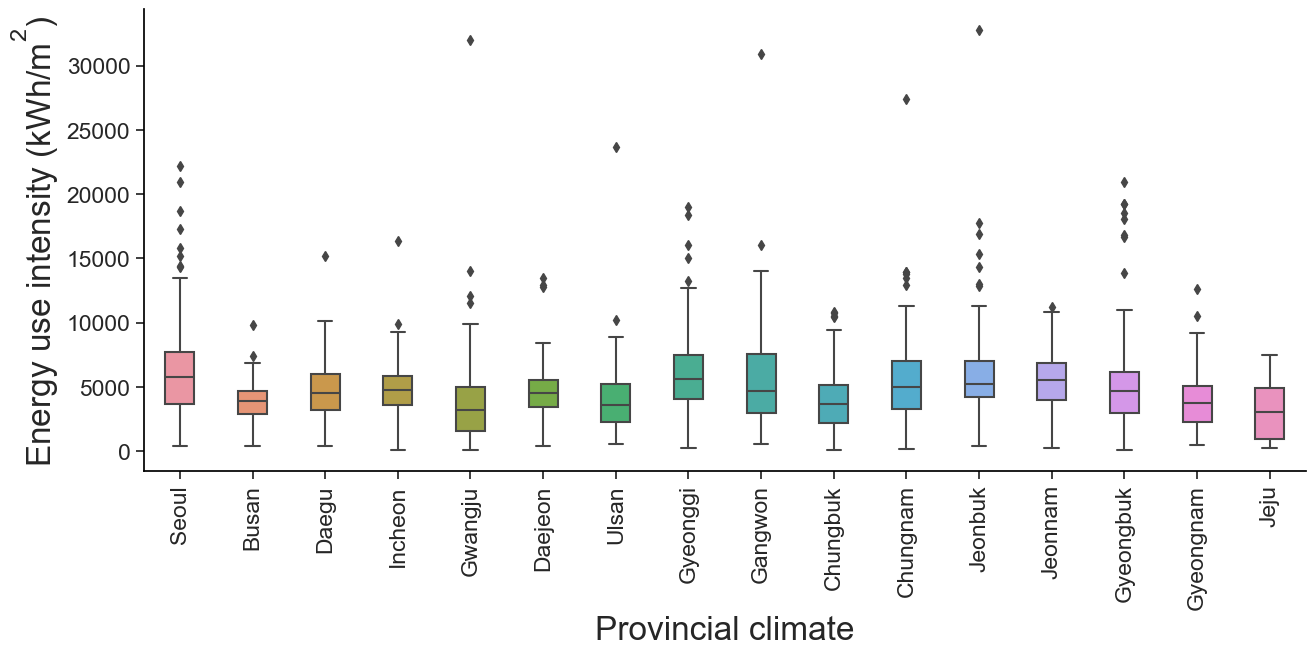

In [5]:
data_for_causal = data_for_causal.loc[(data_for_causal['city_code'] != -2)]

data_for_causal["city_code"] = data_for_causal['city_code'].replace([11, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35, 36, 37, 38, 39], 
                                                                           ["Seoul", "Busan", "Daegu", "Incheon", "Gwangju", "Daejeon", "Ulsan", "Gyeonggi", "Gangwon", "Chungbuk", "Chungnam", "Jeonbuk",
                                                                            "Jeonnam", "Gyeongbuk", "Gyeongnam", "Jeju"])


plt.figure(figsize=(15,6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale=1.5)
plt.rcParams["axes.edgecolor"] = "black"
# draw = sns.violinplot(x = temp['IECC_CLIMATE'], y = temp['KWHCOL'], hue=temp['TEMP_CHANGE'])
draw = sns.boxplot(x = data_for_causal['city_code'], y = data_for_causal['total_kWh'], width=0.4, order= ["Seoul", "Busan", "Daegu", "Incheon", "Gwangju", "Daejeon", "Ulsan", "Gyeonggi", "Gangwon", "Chungbuk", "Chungnam", "Jeonbuk",
                                                                            "Jeonnam", "Gyeongbuk", "Gyeongnam", "Jeju"])
draw.set_xlabel("Provincial climate",fontsize=24)
draw.set_ylabel("Energy use intensity (kWh/$\mathregular{m^2}$)",fontsize=24)
plt.xticks(rotation=90)
# draw.set(ylim=(0, 25000))
figure = draw.get_figure()
figure.savefig('fig.png', bbox_inches='tight', dpi=300)


In [21]:
filtered_data = data_for_causal.loc[(data_for_causal['city_code'] == "Seoul") | (data_for_causal['city_code'] == "Jeju")]
filtered_data["city_code"] = filtered_data['city_code'].replace(["Seoul","Jeju"], [0, 1])

In [22]:
# Initializing causal model
model = CausalModel(data=filtered_data,
                     graph=G.source.replace("\t", ' ').replace("\n", ' '),
                     treatment="city_code",
                     outcome="total_kWh")

# Identifying the estimation method
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                               
────────────(E[total_kWh|HDD18_bins])
d[city_code]                         
Estimand assumption 1, Unconfoundedness: If U→{city_code} and U→total_kWh then P(total_kWh|city_code,HDD18_bins,U) = P(total_kWh|city_code,HDD18_bins)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [23]:
random_state = 120
dml_estimate = model.estimate_effect(identified_estimand,
                                     method_name="backdoor.econml.dml.DML", # Calling EconMl double machine learning algorithm
                                     control_value = 0,
                                     treatment_value = 1,
                                     target_units = 'ate',
                                     confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(random_state=random_state, learning_rate=0.0001),
                                                              'model_t': GradientBoostingRegressor(random_state=random_state, learning_rate=0.0001),
                                                              "model_final":LassoCV(fit_intercept=False, random_state=random_state),
                                                              'featurizer':PolynomialFeatures(degree=1, include_bias=True),
                                                              'random_state':random_state},
                                               "fit_params":{}})
print(dml_estimate.value)

-2457.4438410242215


In [ ]:
# Random cause
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause", random_seed=123)
print(res_random)

# Add Unobserved Common Causes
res_unobserved=model.refute_estimate(identified_estimand, dml_estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02, random_seed=123)
print(res_unobserved)

# Placebo Treatment
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", random_seed=123)
print(res_placebo)


# Data Subsets Validation
res_subset=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="data_subset_refuter", subset_fraction=0.8,
        num_simulations=10, random_seed=123)
print(res_subset)